In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from os import listdir
from os.path import isfile, join
from tqdm import tqdm

In [ ]:
18a61a07e6f5f13ebfee57fa36cd8b6f

In [ ]:
def apply_clahe(image, clip_limit= 0.5, tile_grid_size=(8, 8)):
    # Chuyển đổi ảnh sang ảnh grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Tạo bộ cân bằng histogram CLAHE
    clahe = cv2.createCLAHE(clipLimit=clip_limit, tileGridSize=tile_grid_size)
    
    # Áp dụng CLAHE vào ảnh grayscale
    clahe_image = clahe.apply(gray_image)
    #clahe_image = cv2.equalizeHist(gray_image)
    # Chuyển đổi lại sang ảnh màu
    clahe_image = cv2.cvtColor(clahe_image, cv2.COLOR_GRAY2BGR)

    return clahe_image

### Kiểm tra file

In [ ]:
# Đường dẫn đến ảnh X-quang
image_path = 'Sample.png'
# Đọc ảnh X-quang
image = cv2.imread(image_path, 0)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

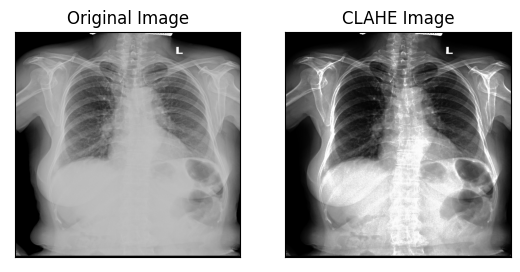

In [ ]:
clahe_image = apply_clahe(image, 1)
plt.subplot(121), plt.imshow(image, cmap='gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(clahe_image, cmap='gray')
plt.title('CLAHE Image'), plt.xticks([]), plt.yticks([])
plt.show()

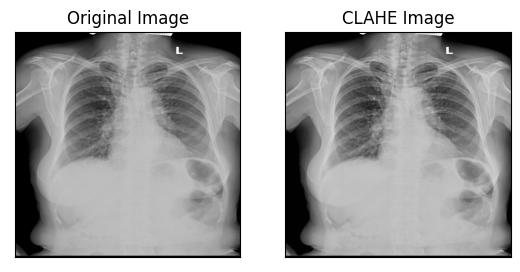

In [ ]:
clahe_image = apply_clahe(image, 0.4)
plt.subplot(121), plt.imshow(image, cmap='gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(clahe_image, cmap='gray')
plt.title('CLAHE Image'), plt.xticks([]), plt.yticks([])
plt.show()

In [ ]:
def thresholding(image, threshold):
    # Chuyển đổi ảnh sang ảnh grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Áp dụng phép chuyển đổi Thresholding
    _, thresholded_image = cv2.threshold(gray_image, threshold, 255, cv2.THRESH_BINARY)
    
    return thresholded_image

In [ ]:
def apply_unsharp_masking(image, sigma=1.0, strength=1.5):
    # Convert the image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply Gaussian blur to create a blurred image
    blurred_image = cv2.GaussianBlur(gray_image, (0, 0), sigma)

    # Subtract the blurred image from the original image
    mask = cv2.subtract(gray_image, blurred_image)

    # Scale the mask by the strength parameter
    scaled_mask = cv2.multiply(mask, strength)

    # Add the scaled mask to the original image
    unsharp_masked_image = cv2.add(gray_image, scaled_mask)

    # Convert the image back to color
    unsharp_masked_image = cv2.cvtColor(unsharp_masked_image, cv2.COLOR_GRAY2BGR)

    return unsharp_masked_image

In [ ]:
def bilateral_filter(image):
    # Áp dụng Bilateral filter
    filtered_image = cv2.bilateralFilter(image, 9, 75, 75)

    return filtered_image

## List file PNG

In [ ]:
path = r"vinbigdata\train\Normal"
files = [f for f in listdir(path) if isfile(join(path, f))]

## CLAHE

In [ ]:
def process_1_image(image_path):
    image = cv2.imread(image_path, 0)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    clahe_image = apply_clahe(image, 5)
    clahe_image = cv2.cvtColor(clahe_image, cv2.COLOR_RGB2BGR)
    return clahe_image

In [ ]:
def process_1_folder(folder_process_1_path, list_files):
    for file in tqdm(list_files):
        file_path_save = folder_process_1_path + "\\" + file
        file_path_read = path + "\\" + file
        image = process_1_image(file_path_read)
        cv2.imwrite(file_path_save, image)

In [ ]:
process_1_folder(r"vinbigdata\train\Process 1", files)

100%|████████████████████████████████████████████████████████████████████████████| 15000/15000 [06:43<00:00, 37.19it/s]


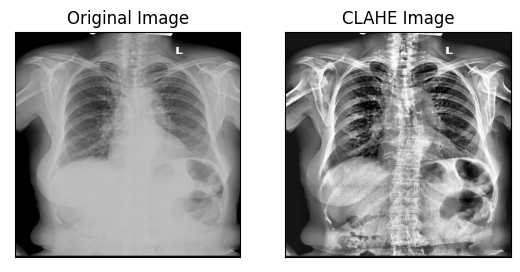

In [ ]:
clahe_image = apply_clahe(image, 20)
plt.subplot(121), plt.imshow(image, cmap='gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(clahe_image, cmap='gray')
plt.title('CLAHE Image'), plt.xticks([]), plt.yticks([])
plt.show()

# BiLa

In [ ]:
def process_2_image(image_path):
    image = cv2.imread(image_path, 0)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    Bila_image = bilateral_filter(image)
    Bila_image = cv2.cvtColor(Bila_image, cv2.COLOR_RGB2BGR)
    return Bila_image

In [ ]:
def process_2_folder(folder_process_2_path, list_files):
    for file in tqdm(list_files):
        file_path_save = folder_process_2_path + "\\" + file
        file_path_read = path + "\\" + file
        image = process_2_image(file_path_read)
        cv2.imwrite(file_path_save, image)

In [ ]:
process_2_folder(r"vinbigdata\train\Process 2", files)

100%|████████████████████████████████████████████████████████████████████████████| 15000/15000 [03:38<00:00, 68.69it/s]


# Unsharp masking

In [ ]:
def process_3_image(image_path):
    image = cv2.imread(image_path, 0)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    UnMa = apply_unsharp_masking(image, sigma=2.0, strength=5)
    UnMa = cv2.cvtColor(UnMa, cv2.COLOR_RGB2BGR)
    return UnMa

In [ ]:
def process_3_folder(folder_process_3_path, list_files):
    for file in tqdm(list_files):
        file_path_save = folder_process_3_path + "\\" + file
        file_path_read = path + "\\" + file
        image = process_3_image(file_path_read)
        cv2.imwrite(file_path_save, image)

In [ ]:
process_3_folder(r"vinbigdata\train\Process 3", files)

100%|████████████████████████████████████████████████████████████████████████████| 15000/15000 [04:11<00:00, 59.57it/s]


# Thresholding Transformations

In [ ]:
def process_4_image(image_path):
    image = cv2.imread(image_path, 0)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    threshold_value = 127
    thres_image = thresholding(image, threshold_value)
    thres_image = cv2.cvtColor(thres_image, cv2.COLOR_RGB2BGR)
    return thres_image

In [ ]:
def process_4_folder(folder_process_4_path, list_files):
    for file in tqdm(list_files):
        file_path_save = folder_process_4_path + "\\" + file
        file_path_read = path + "\\" + file
        image = process_4_image(file_path_read)
        cv2.imwrite(file_path_save, image)

In [ ]:
process_4_folder(r"vinbigdata\train\Process 4", files)

100%|████████████████████████████████████████████████████████████████████████████| 15000/15000 [03:01<00:00, 82.48it/s]
